# COMPROBAMOS ASUNCIONES
---

In [1]:
import pandas as pd

from sklearn.preprocessing import RobustScaler

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

/home/sanfermen/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
df= pd.read_csv("../datos/02-bikes_limpio.csv", index_col= 0).reset_index(drop= True)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,registered
0,winter,0,1,1,1,0,2,14.110847,18.18125,80.5833,10.749882,654
1,winter,0,2,0,4,1,2,14.902598,17.68695,69.6087,16.652113,670
2,winter,0,3,0,4,1,1,8.050924,9.47025,43.7273,16.636703,1229
3,spring,0,4,0,7,0,1,8.200000,10.60610,59.0435,10.739832,1454
4,spring,0,5,0,2,1,1,9.305237,11.46350,43.6957,12.522300,1518


### Asunción de *normalidad* de nuestra variable respuesta, **registered**

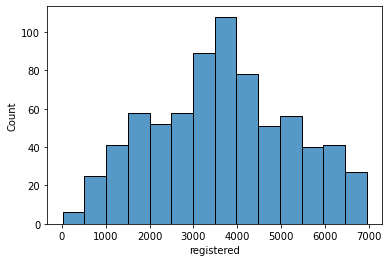

In [4]:
sns.histplot(df["registered"]);

In [5]:
stats.shapiro(df["registered"])

ShapiroResult(statistic=0.98438560962677, pvalue=5.023745757171127e-07)

- Nuestro p-valor es menor a 0.05, con lo cual nuestros datos no son normales. **NO podemos hacer regresión lineal**

- Vamos a intentar **normalizar** la columna respuesta

Probamos con **MinMaxScaler**

In [6]:
minmax = MinMaxScaler()

In [7]:
minmax.fit(df[["registered"]])

MinMaxScaler()

In [8]:
x_norm = minmax.transform(df[["registered"]])

In [9]:
x_norm.min(axis=0)

array([0.])

In [10]:
x_norm.max(axis=0)

array([1.])

In [11]:
num_minmax = pd.DataFrame(x_norm, columns=["registered_Sklearn"])

In [12]:
df["registered_Sklearn"]= num_minmax

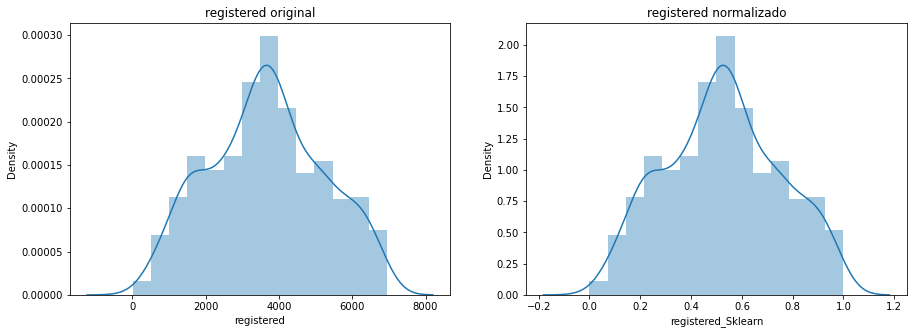

In [13]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('registered original')
axes[1].set_title('registered normalizado')

sns.distplot(df['registered'] ,ax = axes[0])
sns.distplot(df['registered_Sklearn'], ax = axes[1]);

In [14]:
stats.shapiro(df["registered_Sklearn"])

ShapiroResult(statistic=0.98438560962677, pvalue=5.023745757171127e-07)

No conseguimos normalizar con este método

Probamos con el método **BOX-COX**:

In [15]:
df['registered_BOX'], lambda_ajustada = stats.boxcox(df['registered'])

In [16]:
stats.shapiro(df["registered_BOX"])

ShapiroResult(statistic=0.9854231476783752, pvalue=1.1639369859040016e-06)

Seguimos sin conseguir normalizar

No probamos el resto de las asunciones, ya que si no podemos normalizar la columna respuesta, no podemos hacer regresión lineal